<a href="https://colab.research.google.com/github/marcocenl/bedu-proyecto2-Vinografo/blob/main/Proyecto_2_Proyecto_Vinografo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **üç∑ Vinografo:** Un enfoque Data-Driven para comprender la calidad del vino.


##**üîé Tabla de contenidos**

*   ü§Ø ¬øCu√°l es la necesidad o problema a resolver?
*   üè¢ Consultas del negocio
*   üìä Base de datos
*   üëâ Descripci√≥n de las variables
*   ‚≠êÔ∏è Desarrollo del proyecto: An√°lisis exploratorio de datos (EDA)
*   üç∑ Conclusiones finales





##**ü§Ø ¬øCu√°l es la necesidad o problema a resolver?**

La calidad del vino es influenciada por una variedad de factores, como sus propiedades qu√≠micas y caracter√≠sticas organol√©pticas. Resolver el desaf√≠o de identificar la relaci√≥n entre estos factores y la calidad del vino nos permitir√° no solo comprender mejor los matices que influyen en su sabor y percepci√≥n, sino tambi√©n tener una visi√≥n m√°s completa de la complejidad detr√°s de esta apreciada bebida y la experiencia del consumidor.

Adem√°s, al comparar vinos blancos y tintos en t√©rminos de calidad, podemos descubrir patrones espec√≠ficos asociados con cada tipo y arrojar luz sobre posibles diferencias en sus procesos de elaboraci√≥n.


## **üè¢ Consultas del negocio**

1. ¬øEntre vino blanco y tinto, qu√© tipo tuvo mejor calificaci√≥n en calidad?
2. ¬øExiste una relaci√≥n entre cada factor y la calidad del vino?
3. ¬øCu√°l es la influencia de la concentraci√≥n de alcohol en la calidad del vino y c√≥mo se compara esta influencia entre vinos blancos y tintos?


##**üìä Base de datos**

#####**Fuente:**
[Wine Quality Data Set (Red & White Wine)](https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine).

  
######**Descripci√≥n del dataset:**
*   Este conjunto de datos contiene informaci√≥n de 1599 muestras de vino tinto y 4898 muestras de vino blanco.
*   Debido a problemas de privacidad y log√≠stica, no hay datos sobre los tipos de uva, la marca del vino y el precio de venta del vino.

###üëâ **Descripci√≥n de las variables:**

Las variables de entrada en el conjunto de datos consisten en el **tipo de vino** (ya sea vino tinto o vino blanco) y **m√©tricas de pruebas objetivas** (por ejemplo, niveles de acidez, valores de pH, contenido alcoh√≥lico, etc.), mientras que la **variable objetivo/salida** es una puntuaci√≥n num√©rica basada en datos sensoriales, que es la mediana de al menos 3 evaluaciones realizadas por expertos en vinos (En una escala del 0 - muy malo a 10 - excelente).

<br>

Para esta consultor√≠a nos enfocaremos en las siguientes 5 variables que comunmente se cree tienen mayor influencia en la calidad percibida del vino:


1.   **Tipo de vino:** El tipo de vino, ya sea tinto o blanco, es uno de los factores m√°s influyentes, ya que afecta fundamentalmente el perfil de sabor, aroma y estructura del vino.
2.   **Acidez fija:** La acidez fija es crucial para la frescura y la viveza del vino. Una acidez equilibrada puede realzar los sabores y mantener el vino en equilibrio.
3. **Az√∫car residual:** El nivel de az√∫car residual afecta directamente la percepci√≥n de dulzura del vino, lo cual puede tener un impacto importante en c√≥mo se percibe el vino en t√©rminos de equilibrio y gusto.
4. **pH:** El pH influye en la acidez y la sensaci√≥n en boca del vino. Un pH adecuado es esencial para mantener la frescura y el equilibrio en el vino.
5. **Alcohol:** El contenido de alcohol afecta la sensaci√≥n en boca, la intensidad de los sabores y la estructura del vino. Un equilibrio adecuado es esencial para lograr una experiencia agradable.

## **‚≠êÔ∏è Desarrollo del proyecto: An√°lisis exploratorio de datos (EDA)**

### **1.Inicializaci√≥n**

Para comenzar este proyecto:

*   Creamos un [repositorio en Github](https://github.com/mariegarciaor/bedu-proyecto2-Vinografo).
*   Importamos la base de datos como <code>wine-quality-white-and-red.csv</code>
*   Importamos las librerias.



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt


###**2. Carga y descripci√≥n de los datos**

In [ ]:
df_vinografo = pd.read_csv('https://raw.githubusercontent.com/mariegarciaor/bedu-proyecto2-Vinografo/main/wine-quality-white-and-red.csv')

In [ ]:
df_vinografo.sample(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
2869  white            6.0              0.17         0.29             5.0   
424   white            6.9              0.23         0.38             8.3   
3781  white            7.4              0.25         0.29             6.8   
1373  white           10.7              0.22         0.56             8.2   
5344    red           12.5              0.38         0.60             2.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
2869      0.028                 25.0                 108.0  0.99076  3.14   
424       0.047                 47.0                 162.0  0.99540  3.34   
3781      0.020                 31.0                 113.0  0.99338  3.13   
1373      0.044                 37.0                 181.0  0.99800  2.87   
5344      0.081                 31.0                  72.0  0.99960  3.10   

      sulphates  alcohol  quality  
2869       0.34     12.3        6  
424        0.52     10.5        7  
3781       0.29     10.8        6  
1373       0.68      9.5        6  
5344       0.73     10.5        5

###**3. Exploraci√≥n inicial**

üëâ **Mostramos un resumen de las generalidades del set de datos de vinos con el m√©todo `.info()`.**

In [ ]:
df_vinografo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


üí° **Del comando anterior observamos que:**

*   Tenemos 6,497 datos
*   Tenemos un total de 13 columnas
*   Los tipos de datos que tenemos son float64, int64 y object.
*   No contamos con datos nulos pero haremos una comprobaci√≥n con
`isnull()` y `isna()` para el caso de `isna()` usaremos `.sum()`






In [ ]:
df_vinografo.isnull()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     False          False             False        False           False   
1     False          False             False        False           False   
2     False          False             False        False           False   
3     False          False             False        False           False   
4     False          False             False        False           False   
...     ...            ...               ...          ...             ...   
6492  False          False             False        False           False   
6493  False          False             False        False           False   
6494  False          False             False        False           False   
6495  False          False             False        False           False   
6496  False          False             False        False           False   

      chlorides  free sulfur dioxide  total sulfur dioxide  density     pH  \
0         False                False                 False    False  False   
1         False                False                 False    False  False   
2         False                False                 False    False  False   
3         False                False                 False    False  False   
4         False                False                 False    False  False   
...         ...                  ...                   ...      ...    ...   
6492      False                False                 False    False  False   
6493      False                False                 False    False  False   
6494      False                False                 False    False  False   
6495      False                False                 False    False  False   
6496      False                False                 False    False  False   

      sulphates  alcohol  quality  
0         False    False    False  
1         False    False    False  
2         False    False    False  
3         False    False    False  
4         False    False    False  
...         ...      ...      ...  
6492      False    False    False  
6493      False    False    False  
6494      False    False    False  
6495      False    False    False  
6496      False    False    False  

[6497 rows x 13 columns]

In [ ]:
df_vinografo.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

üëâ **A continuaci√≥n utilizamos la funci√≥n `.head()` para ver los primeros registros de la tabla de vinos**

In [ ]:
df_vinografo.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

üëâ **Hemos detectado que es necesario transformar las columnas a snake case.**

Para eso utilizamos la siguiente funci√≥n:

In [ ]:
def pasar_a_snake_case(titulo_columna):
  return titulo_columna.replace(' ', '_')

Luego renombramos las columnas del dataframe:

In [ ]:
df_vinografo.columns = [pasar_a_snake_case(col) for col in df_vinografo.columns ]

Y validamos el cambio:

In [ ]:
df_vinografo.head()

type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

### **4. Resumen estad√≠stico**

**üëâ Creamos una lista con las variables que seleccionamos para analizar.**

In [ ]:
variables_vinografo = ['type','fixed_acidity', 'residual_sugar', 'pH', 'alcohol',	'quality']

üëâ **Utilizamos el m√©todo `.describe()` para obtener informaci√≥n resumida sobre las columnas seleccionadas y num√©ricas en el DataFrame.**

In [ ]:
descripcion = df_vinografo[variables_vinografo].describe().T

In [ ]:
descripcion

count       mean       std   min   25%    50%    75%    max
fixed_acidity   6497.0   7.215307  1.296434  3.80  6.40   7.00   7.70  15.90
residual_sugar  6497.0   5.443235  4.757804  0.60  1.80   3.00   8.10  65.80
pH              6497.0   3.218501  0.160787  2.72  3.11   3.21   3.32   4.01
alcohol         6497.0  10.491801  1.192712  8.00  9.50  10.30  11.30  14.90
quality         6497.0   5.818378  0.873255  3.00  5.00   6.00   6.00   9.00

Con esta funci√≥n obtuvimos informaci√≥n como la media, la desviaci√≥n est√°ndar, el m√≠nimo, el m√°ximo y cuartiles de los datos en cada columna de la base de datos de vinos. Lo que nos permiti√≥ comprender r√°pidamente la distribuci√≥n de datos y detectar posibles problemas en los datos.


üëâ **C√°lculo de `asimetr√≠a` de cada variable.**

La asimetr√≠a (skewness en ingl√©s) es una medida estad√≠stica que describe la simetr√≠a de una distribuci√≥n de datos.

- Asimetr√≠a = 0 indica que la distribuci√≥n es perfectamente sim√©trica.
- Valores positivos de asimetr√≠a indican que la distribuci√≥n se sesga hacia la derecha.
- Valores negativos de asimetr√≠a indican que la distribuci√≥n se sesga hacia la izquierda.

Para esto, importamos `skew` de la librer√≠a `scipy.stats` para poder crear una funci√≥n que nos permita calcular la as√≠metr√≠a de cada variable.

In [ ]:
def calcular_asimetria(dataframe, columnas):
  asimetria_resultados = df_vinografo[columnas].skew()
  return asimetria_resultados

variables_numericas = ['fixed_acidity', 'residual_sugar', 'pH', 'alcohol']
asimetria = calcular_asimetria(df_vinografo, variables_numericas)
asimetria

fixed_acidity     1.723290
residual_sugar    1.435404
pH                0.386839
alcohol           0.565718
dtype: float64

La funci√≥n `calcular_asimetria` toma el DataFrame y calcula la asimetr√≠a de un conjunto de variables almacenadas en `variables_numericas`.

Con esto nos dimos cuenta que todos los coeficientes de asimetr√≠a son positivos, con lo que podemos entender que la distribuci√≥n de los datos est√° sesgada hacia la deecha.


üí° **Conclusiones:**
1.   Para la variable `fixed_acidity`, observamos una asimetr√≠a positiva, indicando que hay valores bajos de acidez fija en la distribuci√≥n de los datos.
2.   En cuanto a `residual_sugar`, se aprecia una fuerte asimetr√≠a hacia la derecha debido a que la media es mayor que la mediana, lo que sugiere la presencia de valores extremadamente altos de az√∫car residual en la muestra.
3. La variable `pH` exhibe una asimetr√≠a positiva, lo que indica que la mayor√≠a de los valores se encuentran en el extremo inferior del rango de pH, sugiriendo una posible acidez predominante.
4. La asimetr√≠a de `alcohol` es positiva, sugiriendo que la mayor√≠a de los vinos tienen un contenido de alcohol relativamente bajo en la muestra.

###**5. Categorizaci√≥n de las variables (funci√≥n vectorizada)**



En nuestro esfuerzo por hacer que la evaluaci√≥n de calidad sea m√°s accesible y significativa, trabajamos en la creaci√≥n de una nueva categor√≠a de calidad que reemplazar√° los valores num√©ricos con los descriptores 'Alto', 'Medio', 'Bajo'.

Esta nueva aproximaci√≥n facilitar√° la toma de decisiones y brindar√° una comprensi√≥n m√°s intuitiva de la calidad de nuestros productos.


üëâ Para comenzar quisimos tener un vistazo r√°pido de las calificaciones que se han asignado a los vinos. Para esto usamos el m√©todo `.unique()`

In [ ]:
df_vinografo['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

Luego creamos una columna adicional `'quality_categry'` que categorizara en "low, "medium" y "high" a los vinos seg√∫n su calificaci√≥n num√©rica en la columna `'quality'`

In [ ]:
df_vinografo['quality_category'] = pd.cut(df_vinografo['quality'], bins= [0,5,8,10], labels = ['low','medium','high'])

Obtenemos una muestra del dataframe para confirmar que se han creado los cambios.

In [ ]:
df_vinografo.sample(6)

type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
6070    red            9.7              0.42         0.46             2.1   
6261    red            8.0              0.83         0.27             2.0   
3136  white            5.6              0.19         0.27             0.9   
292   white            7.4              0.28         0.42            19.8   
2027  white            6.9              0.32         0.15             8.1   
699   white            7.4              0.31         0.48            14.2   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
6070      0.074                  5.0                  16.0  0.99649  3.27   
6261      0.080                 11.0                  63.0  0.99652  3.29   
3136      0.040                 52.0                 103.0  0.99026  3.50   
292       0.066                 53.0                 195.0  1.00000  2.96   
2027      0.046                 51.0                 180.0  0.99580  3.13   
699       0.042                 62.0                 204.0  0.99830  3.06   

      sulphates  alcohol  quality quality_category  
6070       0.74     12.3        6           medium  
6261       0.48      9.8        4              low  
3136       0.39     11.2        5              low  
292        0.44      9.1        5              low  
2027       0.45      8.9        5              low  
699        0.59      9.4        5              low

üëâ Nos interes√≥ conocer cu√°l era la distribuci√≥n de los vinos en estas 3 categor√≠as as√≠ que creamos una funci√≥n que nos permitiera contar y luego mostrar en % la distribuci√≥n.

In [ ]:
counts = df_vinografo['quality_category'].value_counts()
percentages = (counts/len(df_vinografo))*100

percentages_formatted = percentages.round(2).astype(str) + '%'

df_counts = pd.DataFrame({'Count': counts, 'Percentage': percentages_formatted})
df_counts

Count Percentage
medium   4108     63.23%
low      2384     36.69%
high        5      0.08%

##**6. Responder consultas de negocio**

####‚ùì**¬øEntre vino blanco y tinto, qu√© tipo tuvo mejor calificaci√≥n en calidad?**

Para esto utilizaremos una funci√≥n que nos permita obtener los porcentajes:

In [ ]:
counts_with_type = df_vinografo.groupby(['type', 'quality_category']).size().unstack(fill_value=0)
totals_by_type = df_vinografo.groupby('type').size()
percentages_with_type = (counts_with_type.div(totals_by_type, axis=0) * 100).round(2).astype(str) + '%'
percentages_with_type['Total'] = totals_by_type

Esta funci√≥n lo que hace es:
1. Calcular los conteos para cada combinaci√≥n de 'type' y 'quality_category'
2. Calcular los totales por tipo de vino
3. Calcular los porcentajes para cada tipo de vino
4. Agregar una columna para el total por tipo de vino


In [ ]:
percentages_with_type

quality_category     low  medium  high  Total
type                                         
red               46.53%  53.47%  0.0%   1599
white             33.48%  66.41%  0.1%   4898

üí° **Conclusiones:**
1.   Ambos vinos tienen mayor concentraci√≥n de calificaciones medias.
2.   Sin embargo, los vinos con mayor calidad percibida son blancos.




####‚ùì **¬øExiste una relaci√≥n entre cada factor y la calidad del vino?**

In [ ]:
correlation_matrix = df_vinografo[variables_numericas].corrwith(df_vinografo['quality'])
correlation_matrix

fixed_acidity    -0.076743
residual_sugar   -0.036980
pH                0.019506
alcohol           0.444319
dtype: float64

üí° **Conclusiones:**

1. ` fixed_acidity` la calidad del vino tiende a disminuir ligeramente. Sin embargo, la correlaci√≥n es bastante baja, por lo que esta relaci√≥n es d√©bil y podr√≠a no ser significativa.
2. `residual_sugar` la correlaci√≥n tambien es negativa por lo que se entiende que la calidad tiende a disminuir a medida que la cantidad de azucar aumenta.
3. `pH` conforme el pH aumenta y el vino es menos √°cido, la calidad tiende a aumentar ligeramente.
4. `alcohol` tiene una correlaci√≥n positiva relativamente fuerte. Esto sugiere que a medida que el contenido de alcohol en el vino aumenta, la calidad del vino tiende a aumentar significativamente.


üëâ Creamos un gr√°fico de barras para visualizar las correlaciones

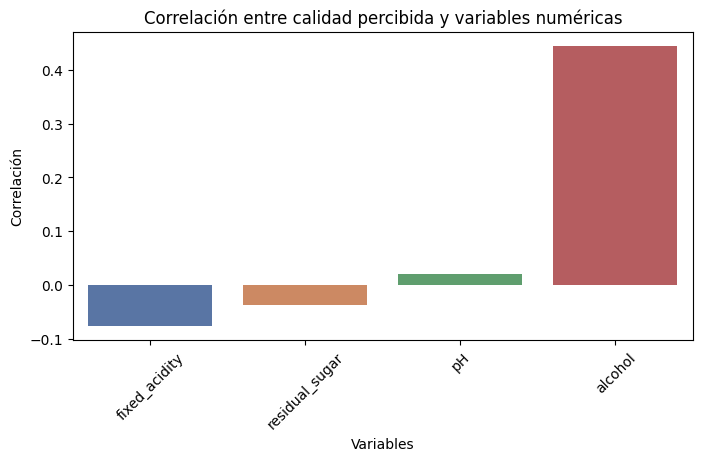

In [ ]:
correlation_df = pd.DataFrame(correlation_matrix, columns=["Correlaci√≥n"])
plt.figure(figsize=(8, 4))
sns.barplot(x=correlation_df.index, y="Correlaci√≥n", data=correlation_df, palette='deep')
plt.xlabel('Variables')
plt.ylabel('Correlaci√≥n')
plt.title('Correlaci√≥n entre calidad percibida y variables num√©ricas')
plt.xticks(rotation=45)
plt.show()

####‚ùì**¬øCu√°l es la influencia de la concentraci√≥n de alcohol en la calidad del vino y c√≥mo se compara esta influencia entre vinos blancos y tintos?**

In [ ]:
grouped = df_vinografo.groupby('type')
correlation_alcohol_by_type = grouped.apply(lambda x: x['alcohol'].corr(x['quality']))
correlation_alcohol_by_type

type
red      0.476166
white    0.435575
dtype: float64

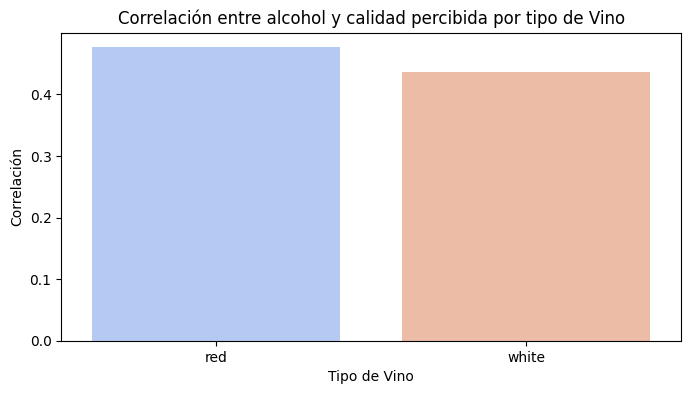

In [ ]:
plt.figure(figsize=(8, 4))  # Ajusta el tama√±o del gr√°fico
sns.barplot(x=correlation_alcohol_by_type.index, y=correlation_alcohol_by_type.values, palette='coolwarm')
plt.xlabel('Tipo de Vino')
plt.ylabel('Correlaci√≥n')
plt.title('Correlaci√≥n entre alcohol y calidad percibida por tipo de Vino')
plt.show()

##üç∑ **Conclusiones finales**

**En este an√°lisis, evaluamos la relaci√≥n entre 5 variables y la calidad de los vinos blancos y tintos.**

*   Observamos que la variable 'alcohol' parece estar m√°s fuertemente relacionada con la calidad del vino en comparaci√≥n con las otras variables, que tienen correlaciones m√°s d√©biles y podr√≠an no ser tan influyentes en la calidad percibida del vino en este conjunto de datos.
*   La correlaci√≥n entre el alcohol y la calidad var√≠a seg√∫n el tipo de vino.
*   En el caso de los vinos tintos, encontramos una correlaci√≥n positiva significativa entre el alcohol y la calidad, lo que sugiere que un mayor contenido de alcohol tiende a asociarse con una mejor calidad en estos vinos.
*   Por otro lado, en los vinos blancos, la correlaci√≥n es menos pronunciada y podr√≠a indicar que la calidad de los vinos blancos est√° influenciada por otros factores en mayor medida.
*   Estas diferencias subrayan la importancia de considerar el tipo de vino al evaluar la influencia de los componentes qu√≠micos en su calidad, lo que puede ser relevante para la producci√≥n y selecci√≥n de vinos de alta calidad.


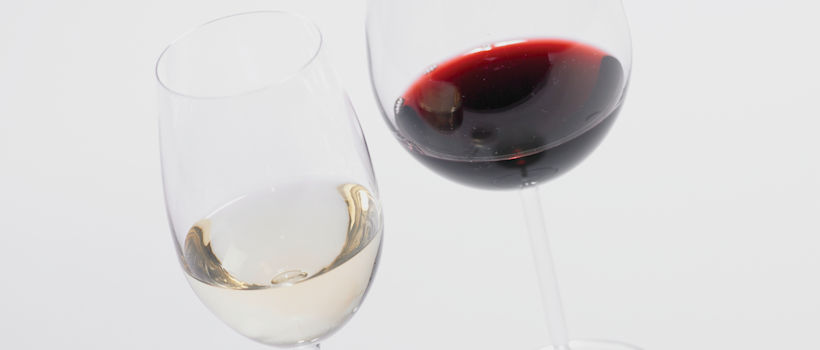